In [1]:
%pylab inline
import Sarba17_SNRLC_test as snrlc
import s17lc_formaria as marialc

Populating the interactive namespace from numpy and matplotlib


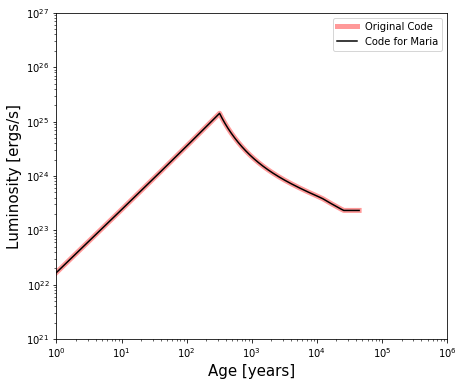

In [31]:
n0 = 1.
e51 = 1.
mej = 2

#From my original code
tim, rad, lum, vel = snrlc.lightcurve_Full(n0=n0, mej=mej, e51=e51, epse=0.0042, pp=2.2, sntype='cc', nu=1.4e9)

#From the code that I sent you
rs = np.zeros(tim.size)
vs = np.zeros(tim.size)
for i in range(tim.size):
    rs[i], vs[i] = marialc.radius_velocity(tim[i], n0, mej, e51, sntype='cc')
ls = marialc.luminosity(rs, vs, n0, 0.0042, 2.2, 1.4e9)

ls[vs<200.]=0 #this is from the assumption in the paper that after shock decelerates to 200 km/s, 
              #electrons aren't accelerated efficiently, so no radio emission. 

plt.figure(figsize=(7,6))
plt.plot(tim[lum>0], lum[lum>0], 'r-', lw=5., alpha=0.4, label='Original Code')
plt.plot(tim[ls>0], ls[ls>0], 'k-', label='Code for Maria')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Age [years]', fontsize=15)
plt.ylabel('Luminosity [ergs/s]', fontsize=15)
plt.xlim(1., 1.0e6)
plt.ylim(1.0e21, 1.0e27)
plt.legend()
plt.show()

In [3]:
??marialc